<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li><li><span><a href="#Итоговый-вывод" data-toc-modified-id="Итоговый-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Итоговый вывод</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

<div style="border:solid Chocolate 2px; padding: 40px">
    
 <b>Добрый день, Анна!</b>
Меня зовут Ксения Цыганова, и я буду комментировать твою работу и помогать тебе сделать ее сильнее. В Практикуме мы общаемся на «ты», но если тебе это будет некомфортно, пожалуйста, скажи, и мы будем обращаться друг к другу на «вы».
    
Все мои комментарии делятся на три вида:

    
👍 Здесь все отлично, идем дальше! - <font color='green'> зеленый цвет </font>
    
💡 Все хорошо, однако, можно оптимизировать или рассмотреть другие способы (необязательно для исполнения, чтобы пройти дальше) - <font color='gold'>желтый цвет</font>
    
🤔 Необходимо внести исправления, без которых я не смогу принять проект - <font color='red'>красный цвет</font>
    
    
Свои комментарии я буду выделять заголовком «комментарий ревьюера». Пожалуйста, не удаляй их до принятия проекта, это поможет сократить время проверки на повторных ревью. Ты также можешь писать свои комментарии к моим и выделять их любым понравившимся способом, отличным от моего. Если у тебя будут возникать вопросы в течение нашей работы, я с радостью на них отвечу.

Цель моего ревью не критика и не возможность дать тебе готовые ответы, это способ привести тебя в нужное русло, чтобы ты смог развить собственные идеи и решения. Твой будущий работодатель будет поступать похожим образом. 
        
   <b>У тебя все получится!</b>

Нам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработаем такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуем корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

## Загрузка данных

In [46]:
# Импорт библиотек
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Загрузка данных
try:
    data = pd.read_csv('/datasets/insurance.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/insurance.csv')

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 
        
Для загрузки данных можно пользоваться конструкцией try/except или библиотекой os.

<div class="alert alert-success">
    <h2> Комментарий студента <a class="tocSkip"> </h2>
        
Ксения, спасибо за важную рекомендацию. Попробовала использовать try/except.

<div class="alert alert-success">
<h2> Комментарий ревьюера №2<a class="tocSkip"> </h2>

<b>Все отлично!
    
Молодец, спасибо.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


Аккуратный датасет без пропусков. Возраст и зарплату можно перевести в целочисленный формат для экономии ресурсов памяти.

In [58]:
# Преобразование в целочисленный формат
data['Зарплата'] = data['Зарплата'].astype('int')
data['Возраст'] = data['Возраст'].astype('int')

In [5]:
data.head()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41,49600,1,0
1,0,46,38000,1,1
2,0,29,21000,0,0
3,0,21,41700,2,0
4,1,28,26100,0,0


In [6]:
# Проверка на дубликаты
data.duplicated().sum()

153

Удалим дублирующиеся строки из исходного датасета.

In [7]:
data.drop_duplicates(inplace = True)

<b>Выводы</b>

В исходных данных удалены дубликаты. Данные по зарплате и возрасту приведены к целочисленному типу, чтобы ускорить обращение к данным.

<div class="alert alert-success">
<h2> Комментарий ревьюера<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Плюс за перевод данных к целочисленному типу.

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 

В этом задании необязательно, но здорово, если есть визуальное представление данных, а также проверка на дубликаты.

<div class="alert alert-success">
<h2> Комментарий студента<a class="tocSkip"> </h2>

Ксения, спасибо за рекомендации. Проверка на дубликаты проведена. Ниже визуальное представление статистики страховых выплат.

<AxesSubplot:xlabel='Страховые выплаты', ylabel='Density'>

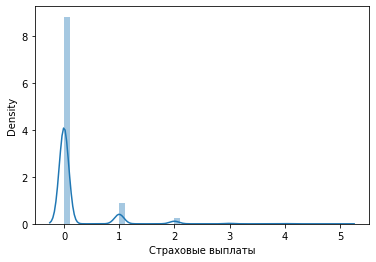

In [50]:
# Оценка плотности ядра данных по страховым выплатам
sns.distplot(data['Страховые выплаты'])

## Умножение матриц

В этом задании мы можем записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружим её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можем их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Ответ:** Качество линейной регрессии при умножении признаков на обратимую матрицу не изменится.

**Обоснование (Попытка 1):** Воспользовавшись следующими правилами:
$$(AB)^T = B^T A^T$$ 
$$(AB)^{-1} = B^{-1} A^{-1}$$
$$AA^{-1}=A^{-1}A = E$$
попробуем провести преобразование признаков.

Преобразуем формулу предсказаний, умножив матрицу X(m, n) на обратимую матрицу K(n, m):

$$w_k = ((XK)^T XK)^{-1} (XK)^T y $$

$$a_k = XKw_k = XK((XK)^T XK)^{-1}(XK)^Ty = XK(X^T K^T XK)^{-1}X^TK^Ty = XKK^{-1}(X^TX)^{-1}K^T X^Ty = $$

$$= XE (X^TX)^{-1}EX^Ty = X(X^TX)^{-1}X^Ty = Xw = a$$

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку🤔:</b>
    
Здесь нужно подумать, какая размерность у матрицы K. Потому что если у нее размерность K(n,m), то выражение $K^{-1}$ неверно.
    
Также есть ошибки в преобразованиях, связанных с тем, что произведение матриц не обладает коммутативностью, за исключением умножения на единичную матрицу. 
    
Также стоит внимательно раскрывать скобки в выражениях типа: $$(AB)^T = B^T A^T$$

<div class="alert alert-warning">
    <h2> Комментарий студента <a class="tocSkip"> </h2>

**Обоснование (Попытка 2):**

Попробуем подступиться к задаче заново с другого ракурса. Изучим, как изменятся значения предсказания a и вектора весов w для новой матрицы B, полученной при умножении исходной матрицы X на обратимую матрицу P:
 
$$B = XP$$
$$a_B = Bw_B$$
$$w_B = (B^TB)^{-1}B^Ty$$
Подставим преобразованное значение w в формулу предсказания a:
 
$$a_B = B(B^TB)^{-1}B^Ty$$
 
Раскроем формулу предсказания, подставив вместо В произведение X на P:
 
$$a_B = XP((XP)^T(XP))^{-1}(XP)^Ty$$
 
Воспользуемся свойством обратной матрицы
$$(AB)^{-1} = B^{-1}A^{-1}$$
 
Раскроем:
 
$$a_B = XP((XP)^T(XP))^{-1}(XP)^Ty = XP(XP)^{-1}((XP)^T)^{-1}(XP)^Ty = XPP^{-1}X^{-1}((XP)^T)^{-1}(XP)^Ty$$
 
Для следующего шага возьмем свойство транспонирования произведения матриц:
$$(AB)^T = B^T A^T$$

и умножения обратных квадратных матриц друг на друга с получением единичной матрицы $$PP^{-1} = E$$
 
Продолжим преобразование с учетом того, что при умножении любой матрицы на единичную (или наоборот) получается та же матрица:
 
$$a_B = XEX^{-1}((XP)^T)^{-1}(XP)^Ty = XX^{-1}(P^T X^T)^{-1} P^T X^T y = XX^{-1}(X^T)^{-1}(P^T)^{-1} P^T X^T y$$
 
Умножение транспонированной матрицы на обратную себе также будет равно единичной матрице: $$(P^T)^{-1} P^T = E$$ Формула примет следующий вид:
 
$$a_B = XX^{-1} (X^T)^{-1} E X^T y = X(X^T X)^{-1} X^T y= Xw = a$$

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера №2<a class="tocSkip"></h2>

    
<b>На доработку🤔:</b>

Направление мысли верное. Однако математически неверные преобразования.
    
Выражение  
$$a_B = XEX^{-1}((XP)^T)^{-1}(XP)^Ty = XX^{-1}(P^T X^T)^{-1} P^T X^T y = XX^{-1}(X^T)^{-1}(P^T)^{-1} P^T X^T y$$ - некорректно, так как для неквадратных матриц $X$ и $X^T$ обратных матриц не существует.
    
    
То же самое касается выражения:
$$a_B = XX^{-1} (X^T)^{-1} E X^T y = X(X^T X)^{-1} X^T y= Xw = a$$

<div class="alert alert-warning">
    <h2> Комментарий студента №2 <a class="tocSkip"> </h2>

**Обоснование (Попытка 3):**

        
Раз для неквадратных $X$ и $X^T$ обратных матриц не существует, преобразуем формулу весов $w$ с фокусом на манипуляции с квадратной обратимой матрицей $P$:
        

$$w_P = ((XP)^T(XP))^{-1} (XP)^Ty = P^{-1}((XP)^{T}X)^{-1} (XP)^Ty = P^{-1}((XP)^{T}X)^{-1} P^TX^Ty = $$
        
$$ = P^{-1}(P^TX^TX)^{-1} P^TX^Ty = P^{-1}(X^TX)^{-1}(P^T)^{-1} P^TX^Ty $$
        
        

Опустим в преобразовании следующий блок $(P^T)^{-1} P^T = E$ как сводящийся к единичной матрице и получим:

$$w_P = P^{-1}(X^TX)^{-1} X^Ty$$

То есть подставив формулу для $w = (X^TX)^{-1}X^Ty$, получим:

$$w_P = P^{-1}w$$

А предсказание $a_P$ для признаков, преобразованных умножением на обратимую квадратную матрицу, $XP$ примет следующий вид:
$$a_P = XPw_P = XPP^{-1}w = Xw = a$$

В конечном счете векторы предсказаний до умножения признаков на обратимую квадратную матрицу и после такого преобразования совпали.

<div class="alert alert-success">
<h2> Комментарий ревьюера №3<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Теперь все безупречно! Молодец!

<b>Вывод:</b> значение предсказания **a** не меняется при умножении матрицы признаков на обратимую матрицу, то есть матрица преобразования P должна быть квадратной с определителем НЕ равным 0.

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера №2<a class="tocSkip"></h2>

    
<b>На доработку🤔:</b>
    
Определитель обратимой матрицы наоборот НЕ равен 0.

<div class="alert alert-warning">
    <h2> Комментарий студента №2 <a class="tocSkip"> </h2>
Ох, постыдная ошибка - поправила. Спасибо.

<div class="alert alert-success">
<h2> Комментарий ревьюера №3<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
На мой взгляд единственное постыдное, что есть в обучении, да также как и в жизни, это нежелание признавать и рефлексировать над своими ошибками. У тебя этого не наблюдается, поэтому и постыдного ничего нет)
Ошибки - это область роста, поэтому это хорошо)

## Алгоритм преобразования

**Алгоритм**

Для проверки корректности предлагаемого алгоритма защиты информации будем изучать метрики качества регрессии до и после преобразования. В качестве преобразования будем умножать матрицу признаков на обратимую матрицу P, сгенерированную случайным образом.

1. Обучим модель для матрицы признаков Х до преобразования и узнаем исходные метрики качества 
2. Сгенерируем рандомную квадратную матрицу P и проверим ее на обратимость
3. Сформируем матрицу преобразованных признаков B = XP путем умножения матрицы признаков X на обратимую матрицу P
4. Получим предсказания по модели на преобразованных признаках P и измерим метрики качества

**Обоснование**

При перемножении матриц X и P важно соблюдать необходимую размерность. Обратная матрица P существует только для квадратных невырожденных матриц (определитель которых не равен нулю).

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку🤔:</b>
    
Здесь также нужно внимательно посмотреть, чему рано P в третьем пункте, исходя из некоммутативности произведения матриц.
    
В обосновании стоит проверить, какие матрицы перемножаются.

<div class="alert alert-warning">
    <h2> Комментарий студента <a class="tocSkip"> </h2>

**Уточнения к алгоритму**

3. Случайная матрица P должна быть квадратной с размерностью (m x m), где m - это ширина матрицы признаков X (m x n). 

**Обоснование**

Умножение матрицы на матрицу возможно, если ширина первой матрицы (m x n) равна высоте второй матрицы (n x r). Тогда размер произведения этих матриц будет m x r (размерность n "схлопывается"). Результат умножения матриц зависит от порядка множителей. Если ширина первой матрицы не равна длине второй, то умножение невозможно. 

Поэтому для нашей задачи необходимо строгое умножение матрицы признаков X (m x n) на случайную обратимую матрицу P (m x m).

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера №2<a class="tocSkip"></h2>

    
<b>На доработку🤔:</b>
    
Ты все правильно пишешь, кроме размерности матрицы X.
    
Исходя из твоих же выводов, перемножение матриц X (m x n) и случайной обратимой матрицы P (m x m), будет невозможно. 
Подумай, пожалуйста, какая размерность будет у матрицы X.

<div class="alert alert-warning">
    <h2> Комментарий студента №2 <a class="tocSkip"> </h2>

Похоже, я запуталась в обозначении размерностей. Опиралась на определение произведения матриц ("в произведении матриц АВ число строк равно числу строк матрицы А, а число столбцов равно числу столбцов матрицы В") и попутала последовательности. 

Если брать мою выкладку, описанную ранее, то матрица X должна иметь размерность X(n x m).

<div class="alert alert-success">
<h2> Комментарий ревьюера №3<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Да, теперь все верно.

## Проверка алгоритма

In [8]:
# Определим исходные и целевой признаки
features = data.drop('Страховые выплаты', axis=1).values
target = data['Страховые выплаты'].values

In [9]:
# Разделим данные на обучающую и тестовую выборки
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.25, random_state=12345)

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Молодец, что делишь на тренирововчную и тестовую выборки.

In [10]:
# Запустим на исходном датасете модель линейной регрессии
model = LinearRegression()
model.fit(features_train, target_train)

LinearRegression()

In [11]:
# Проверим R2-метрику для работы модели линейной регрессии до преобразования
r2_before = r2_score(target_test, model.predict(features_test))
print("R2-метрика качества линейной регрессии на исходных признаках:", r2_before)

R2-метрика качества линейной регрессии на исходных признаках: 0.42307727615837565


<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Обучение прошло верно.

Сгенерируем случайным образом квадратную матрицу 4х4

In [12]:
matrix = np.random.normal(size = (4,4)) 
matrix

array([[-0.54915156, -0.6096332 , -0.85367095, -1.20624174],
       [ 0.26453389, -0.48325437, -0.92328575,  0.27020407],
       [-0.20951706, -0.08439969, -0.04280263, -0.7169035 ],
       [-1.24249541,  0.95885608, -0.41925829, -0.37649239]])

Проверим обратимость матрицы, то есть попробуем найти матрицу, обратную ей.

In [13]:
matrix_inv = np.linalg.inv(matrix)
matrix_inv

array([[-2.56561943,  2.16942268,  5.17761622, -0.08209221],
       [-2.54484384,  1.80585844,  4.5750751 ,  0.7377568 ],
       [ 0.88849479, -1.62607377, -1.88688676, -0.42071379],
       [ 0.99636165, -0.74953564, -3.33401934, -0.03774437]])

In [14]:
# Умножим исходные признаки на рандомную матрицу
features_x = features @ matrix

In [15]:
# Разделим преобразованные данные на обучающую и тестовую выборки
features_train, features_test, target_train, target_test = train_test_split(
    features_x, target, test_size=0.25, random_state=12345)

In [16]:
# Обучим модель линейной регрессии
model.fit(features_x, target)

LinearRegression()

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 

Разделение на тренировочную и тестовую выборки необходимо производить до обучения. А иначе утрачивается смысл разделения: модель, обучаясь на всем наборе данных, "запоминает" тестовые данные и затем может выдать другой скор, не соответсвующий скору, который она может выдавать, работая с новыми данными.

<div class="alert alert-warning">
    <h2> Комментарий студента <a class="tocSkip"> </h2>
        
Спасибо за веское замечание. Поправила недоразумение.

<div class="alert alert-success">
<h2> Комментарий ревьюера №2<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Теперь все хорошо.

In [17]:
# Проверим R2-метрику для работы модели линейной регрессии после преобразования
r2_after = r2_score(target_test, model.predict(features_test))
print("R2-метрика качества линейной регрессии на преобразованных признаках:", r2_after)

R2-метрика качества линейной регрессии на преобразованных признаках: 0.4241846348619305


<b> Вывод</b>

После преобразования качество линейной регрессии практически не изменилось: R2-метрика не меняет своего значения. 
Алгоритм преобразования (защиты) данных должен работать корректно.

<div class="alert alert-success">
<h2> Комментарий ревьюера №2<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Вывод верный.

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 

Также можно посмотреть на преобразованные данные, чтобы посмотреть, защищены ли они.
Кроме этого можно проверить возможность восстановления данных. 

In [65]:
# Попытка восстановить исходные признаки
original = features_x @ matrix_inv
restore = pd.DataFrame(original.astype('int'))
restore.head()

,0,1,2,3
0,1,40,49599,0
1,0,45,37999,0
2,0,29,21000,0
3,0,20,41699,1
4,1,27,26099,0


Личные данные достаточно хорошо защищены от дешифровки.

## Итоговый вывод

В ходе проекта мы:

- Загрузили и изучили исходные данные
- При преобразовании формул пришли к выводу, что качество линейной регресии не меняется при умножении исходной матрицы данных на случайно сгенерированную обратимую матрицу
- Предложили алгоритм преобразования данных и исследовали его на изменение R2-метрики качества работы модели линейной регрессии до и после преобразования.

По итогам проекта приходим к выводу, что использование матричных операций хорошо показывает себя для задач безопасной защиты данных. 

<div class="alert alert-success">
<h2> Комментарий ревьюера №2<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Хороший итоговый вывод.

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 

Если интересно, более подробно о теме можно почитать в следующих материалах:
        
1. Обзоры по применению криптографии в машинном обучении: https://arxiv.org/pdf/1902.04109.pdf, https://www.researchgate.net/publication/342746786_Some_Applications_of_Machine_Learning_in_Cryptography
2. Подробнее про аналогичный алгоритм: https://www.cs.cmu.edu/~rjhall/JOS_revised_May_31a.pdf

<div class="alert alert-warning">
    <h2> Комментарий студента <a class="tocSkip"> </h2>
        
Очень интересные ссылки, спасибо. Буду планомерно изучать.

## Чек-лист проверки

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [ ]  Весь код выполняется без ошибок
- [ ]  Ячейки с кодом расположены в порядке исполнения
- [ ]  Выполнен шаг 1: данные загружены
- [ ]  Выполнен шаг 2: получен ответ на вопрос об умножении матриц
    - [ ]  Указан правильный вариант ответа
    - [ ]  Вариант обоснован
- [ ]  Выполнен шаг 3: предложен алгоритм преобразования
    - [ ]  Алгоритм описан
    - [ ]  Алгоритм обоснован
- [ ]  Выполнен шаг 4: алгоритм проверен
    - [ ]  Алгоритм реализован
    - [ ]  Проведено сравнение качества моделей до и после преобразования

<div style="border:solid Chocolate 2px; padding: 40px">
    
<b>Общий вывод по проекту</b>

Анна, благодарю тебя за работу! 
У тебя хороший, доведенный до конца проект.
Стоит еще раз обратить внимание на корректность матричных преобразований, чтобы отшлифовать твой проект для портфолио.

**Положительные моменты проекта, которые хочу еще раз подчеркнуть**:

    1. Анализ данных, с которыми работаешь,
    2. Пояснения и выводы на протяжении всей работы,
    3. Четко выдержана структура проекта,
    4. Верно понят и реализован алгоритм шифрования,
    5. Аккуратность кода на высоком уровне.
   

**Замечания, на которые стоит обратить внимания при будущей работе**:
    
    1. Поработать над теоретическим обоснованием алгоритма шифрования. 
    2. Возможно, добавить этап перехода от преобразованных данных к исходным.
    
Остальные мои комментарии ты найдешь выше.
    
**Желаю удачи и жду твой проект на повторное ревью!**

<div style="border:solid Chocolate 2px; padding: 40px">
    
<b>Общий вывод по проекту №2</b>
    
Ты молодец, хорошая работа.
    
Однако стоит еще раз поработать с математикой. Уверена, ты разберешься.
Также можешь задать свои вопросы, если они есть, я, с удовольствием, постараюсь на них ответить.
    
**Снова жду твой проект на следующее ревью!**


<div style="border:solid Chocolate 2px; padding: 40px">
    
<b>Общий вывод по проекту №3</b>
    
Анна, спасибо за готовность старательно и планомерно доводить дело до конца.
    
Уверена, у тебя все будет успешно! 
    
**Удачи тебе! Проект принимаю.**
    